# Creating Your Own Prototypical Inheritance

In [ ]:
function Shape(){
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape");
};

function Circle(radius) {
  this.radius = radius;
}

Circle.prototype.draw = function() {
  console.log("Drawing a circle with radius: " + this.radius);
}

const s = new Shape();
const c = new Circle(1);

Below is the current structure of how the Object base, Circle base, and Shape base are actually related.

![alt text](Image-2.jpg)

To setup inheritnace here, We want to have circleBase inherits from the ShapeBase.

![alt text](Image-5.png)

So, instead of making `CircleBase` inherit from `ObjectBase`, we should make `CircleBase` inherit from `ShapeBase`.

In [ ]:
function Shape(){
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape");
};

function Circle(radius) {
  this.radius = radius;
}

// Inheriting from the Shape prototype
Circle.prototype = Object.create(Shape.prototype);

// This should come after inheriting
Circle.prototype.draw = function() {
  console.log("Drawing a circle with radius: " + this.radius);
}

const s = new Shape();
const c = new Circle(1);

c.duplicate(); // Should call the duplicate method from Shape

Duplicating shape


Before we explicitly write `Circle.prototype = Object.create(Shape.prototype)`, the default is that `Circle.prototype` inherits from `Object.prototype` `(Circle.prototype = Object.create(Objecct.prototype))`. That’s why, by default, `CircleBase` inherits from `ObjectBase`.

---------

Here, the `Circle` object first inherits from `CircleBase`. Then, `CircleBase` inherits from `ShapeBase`, and `ShapeBase` in turn inherits from `ObjectBase`.

![alt text](Image-8.jpg)



# Resetting the Constructor

When we inherit from another constructor function in JavaScript using this line:

```javascript
Circle.prototype = Object.create(Shape.prototype);
```

We are replacing `Circle.prototype` with a new object that is based on `Shape.prototype`. This allows Circle to inherit methods from Shape.

**However, there's a problem.**

When we do this, the constructor property of Circle.prototype no longer points to Circle. Instead, it points to Shape, because the new prototype object was created from Shape.prototype.

So this:

```javascript
Circle.prototype.constructor === Shape // (this should not happen)
```

![alt text](image-11.jpg)

After inheritance, If the constructor still pointed to `Shape`, this line would create a `Shape` object instead of a `Circle`, which is not what we want.

To fix this, we need to reset the `constructor` property back to `Circle`:

```javascript
Circle.prototype.constructor = Circle;
```

Now Again:

```javascript
Circle.prototype.constructor === Circle 
```

This is especially useful when you want to dynamically create objects like this:

`const anotherCircle = new c.constructor(5);` 

In [3]:
function Shape(){
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape");
};

function Circle(radius) {
  this.radius = radius;
}

// Inheriting from the Shape prototype
Circle.prototype = Object.create(Shape.prototype);
// Resetting the constructor
Circle.prototype.constructor = Circle;

Circle.prototype.draw = function() {
  console.log("Drawing a circle with radius: " + this.radius);
}

const s = new Shape();
const c = new Circle(1);

c.duplicate(); 

Duplicating shape


# Calling the Super Constructor

First, let's modify the Shape constructor to include a color property.

```javascript
function Shape(color){
    this.color = color
}
```

Now, Let's call Parent(Super) constructor.

In [ ]:
function Shape(color){
    this.color = color;
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape of color: " + this.color);
};

function Circle(radius, color) {
  // Call the Shape constructor
  Shape.call(this, color);

  this.radius = radius;
}

Circle.prototype = Object.create(Shape.prototype);
Circle.prototype.constructor = Circle;

Circle.prototype.draw = function() {
  console.log("Drawing a circle with radius: " + this.radius + " and color: " + this.color);
}

const c = new Circle(1, "red");
c.duplicate(); 
c.draw(); 

Duplicating shape of color: red
Drawing a circle with radius: 1 and color: red


# Intermediate Function Inheritance

If we have multiple objects (e.g. 10) inheriting from the same parent, writing the two lines to set up inheritance and reset the constructor every time can be repetitive. To avoid this, we can create a reusable function to handle inheritance for us.

In [ ]:
function Shape(color){
    this.color = color;
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape of color: " + this.color);
};

function extend(Child, Parent) {
  Child.prototype = Object.create(Parent.prototype);
  Child.prototype.constructor = Child;
}

function Circle(radius, color) {
  Shape.call(this, color);
  this.radius = radius;
}

extend(Circle, Shape);

function Square(size) {
  this.size = size;
}

This `extend function` is what we call the `Intermediate Function Inheritance`

# Method Overriding

By using method overriding, we can easily replace (or customize) a method defined in the base object with a new version in the derived object.

In [ ]:
function Shape(color){
    this.color = color;
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape ");
};

function extend(Child, Parent) {
  Child.prototype = Object.create(Parent.prototype);
  Child.prototype.constructor = Child;
}

function Circle(radius, color) {
  Shape.call(this, color);
  this.radius = radius;
}

extend(Circle, Shape);

// Method Overiding
// This should comes after the extend function
Circle.prototype.duplicate = function() {
    console.log("Duplicating the Circle");
};

const c = new Circle(1, "red");
c.duplicate(); 

Duplicating the Circle


It’s very important to override this method after the **`Circle extends (or inherits from)`** the base `Shape` object. Otherwise, it won’t work as expected.

If we need to include the **parent’s implementation** as well, we can do it like this:

In [ ]:
function Shape(color){
    this.color = color;
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape ");
};

function extend(Child, Parent) {
  Child.prototype = Object.create(Parent.prototype);
  Child.prototype.constructor = Child;
}

function Circle(radius, color) {
  Shape.call(this, color);
  this.radius = radius;
}

extend(Circle, Shape);

Circle.prototype.duplicate = function() {
    Shape.prototype.duplicate.call(this);  // Call the parent method
    console.log("Duplicating the Circle");
};

const c = new Circle(1, "red");
c.duplicate(); 

Duplicating shape 
Duplicating the Circle


# Polymorphism

Polymorphism means "many forms." It helps us reduce the need for multiple if-else or switch blocks by allowing different objects to respond to the same method in their own way.

In [8]:
function Shape(color){
    this.color = color;
}

Shape.prototype.duplicate = function() {
  console.log("Duplicating shape ");
};

function extend(Child, Parent) {
  Child.prototype = Object.create(Parent.prototype);
  Child.prototype.constructor = Child;
}

function Circle(radius, color) {
  Shape.call(this, color);
  this.radius = radius;
}

extend(Circle, Shape);

Circle.prototype.duplicate = function() {
    console.log("Duplicating the Circle");
};


function Square(size) {
  this.size = size;
}

extend(Square, Shape);

Square.prototype.duplicate = function() {
    console.log("Duplicating the Square");
};

const ShapeArray = [ new Circle(1, "red"), new Square(2) ];

for (let shape of ShapeArray) {
    shape.duplicate(); // Calls the duplicate method of Circle or Square
}


Duplicating the Circle
Duplicating the Square


Without polymorphism, we would have to call each method separately for each shape. This is not ideal because it makes the code longer, harder to manage, and less flexible.

In [ ]:
for (let shape of ShapeArray) {
    if (shape.type === "Circle") {
        duplicateCircle(); 
    } else if (shape.type === "Square") {
        duplicateSquare(); 
    } else {
        duplicateShape(); 
    }
}

# When to Use Inheritance

While inheritance can be a great tool for solving the problems of code reuse, it can sometimes make code complex or fragile. Also, inheritance is not the only solution for code reuse. There is another technique called `composition` for code reuse.

Here is the problem with inheritance:

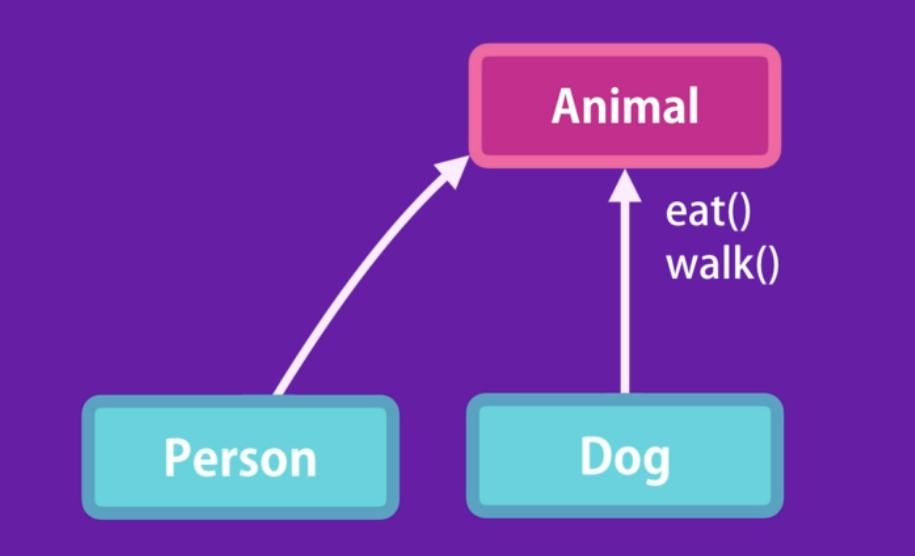

In the above example, if we need to add another animal like goldfish, our hierarchy will be broken (because goldfish can only swim, it can't walk). So we have to change our hierarchy in the below way.

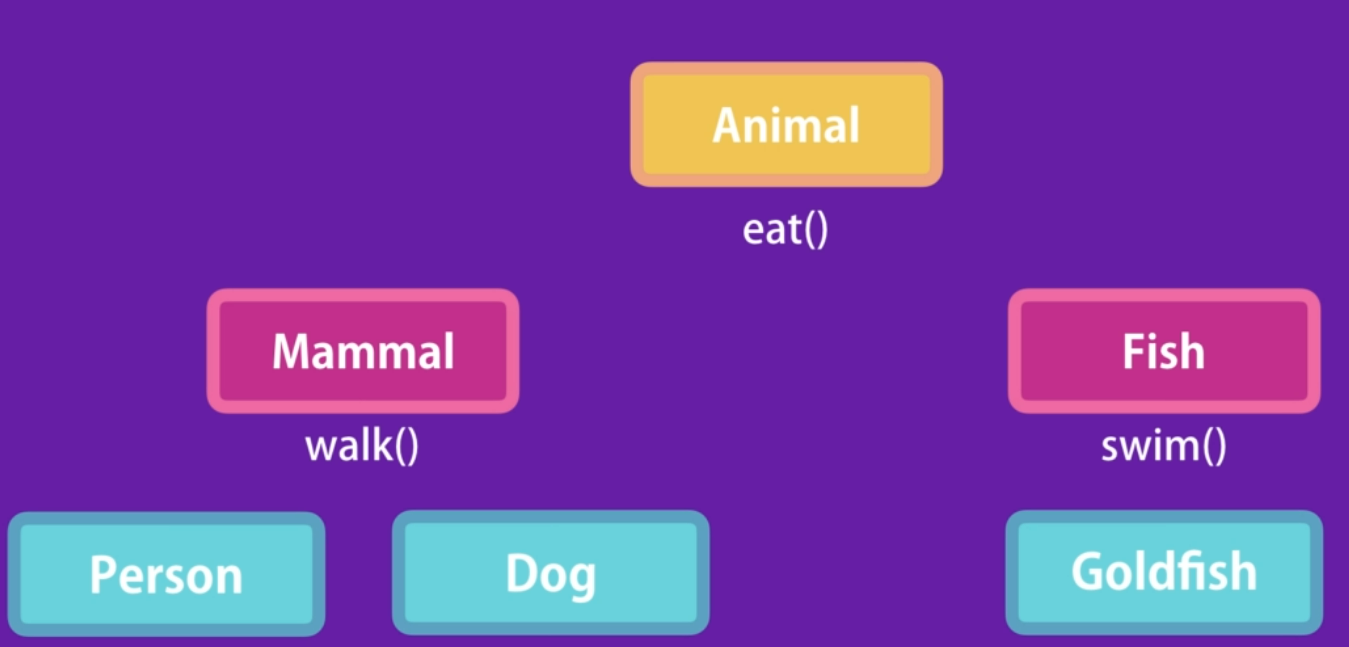

If we have 10 different types of animals, this hierarchy will get more and more complex. 

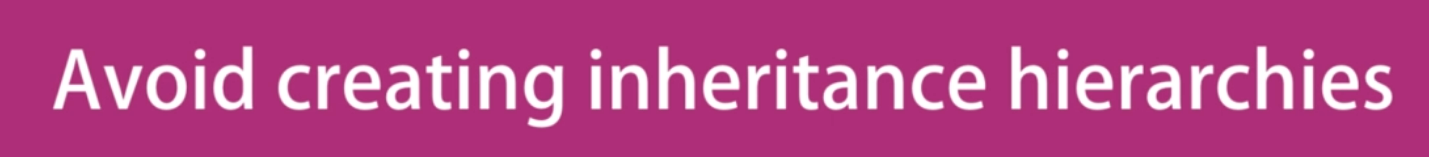

So, When we use inheritance, we should keep it to one level.

There is a famous saying:

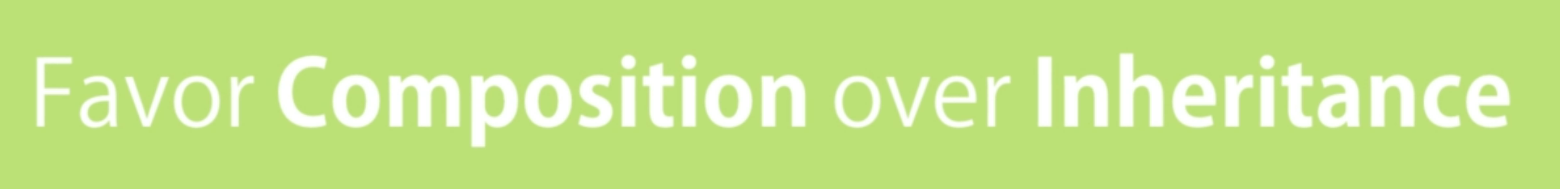

With composition, we can avoid complex hierarchies like this. We can compose a few objects together to create a new object, and this technique gives us great flexibility.

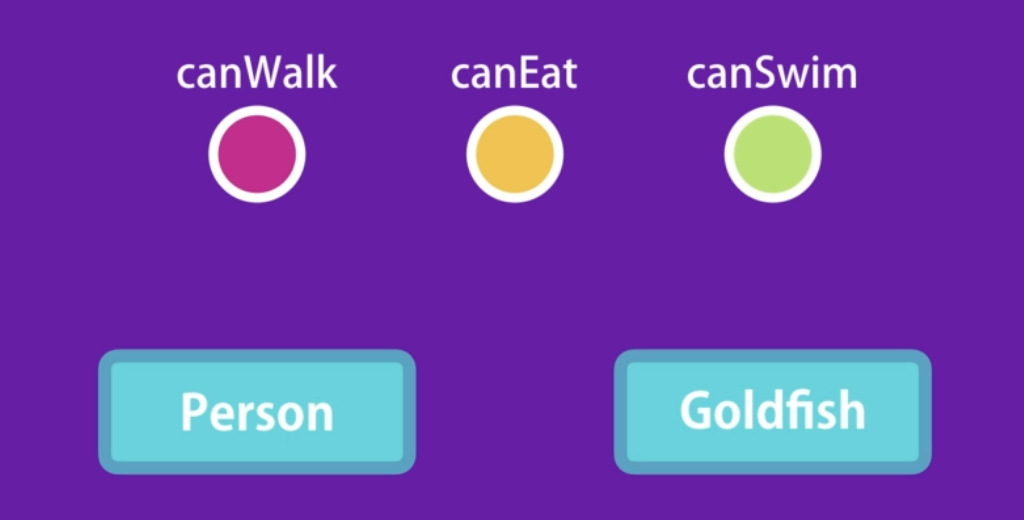

So instead of using inheritance, we can define various features for our animals as independent objects. So we can have three objects like canWalk, canEat, and canSwim. Each of these objects are plain JavaScript objects with certain properties and methods.

So now if we want to have a person object, we can simply compose canWalk and canEat to create a person object. Tomorrow, if we want to create a goldfish, we can compose canEat and canSwim together to produce a goldfish. So we won’t have a hierarchy—we can come up with any combination.

In JavaScript, we can use **`mixins`** to achieve **composition**.

# Mixins

In [1]:
const canEat = {
    eat: function() {
        this.hunger--;
        console.log("Eating...");
    }
}

const canWalk = {
    walk: function() {
        console.log("Walking...");
    }
}

// Using Object.assign to combine behaviors
const person_1 = Object.assign({}, canEat, canWalk);

console.log(person_1);

{ eat: [Function: eat], walk: [Function: walk] }


"We can also use a `constructor function` to create a Person object

In [2]:
function Person() {
}

Object.assign(Person.prototype, canEat, canWalk);

const person_2 = new Person();

console.log(person_2);

Person {}


In the future, if we want to create a `Goldfish` object, we can do that easily too.

In [ ]:
const canEat = {
    eat: function() {
        this.hunger--;
        console.log("Eating...");
    }
}

const canWalk = {
    walk: function() {
        console.log("Walking...");
    }
}


// Using Object.assign to combine behaviors
const person_1 = Object.assign({}, canEat, canWalk);
console.log(person_1);



const canSwim = {
    swim: function() {
        console.log("Swimming...");
    }
}

console.log("----------------");

// Using Constructor fuction to create the Object
function GoldFish(){
}

Object.assign(GoldFish.prototype, canEat, canSwim);

const goldfish = new GoldFish();
console.log(goldfish);

{ eat: [Function: eat], walk: [Function: walk] }
GoldFish {}


To avoid repeatedly using `Object.assign`, we can create a reusable mixin function to combine behaviors.

In [5]:
const canEat = {
    eat: function() {
        this.hunger--;
        console.log("Eating...");
    }
}

const canWalk = {
    walk: function() {
        console.log("Walking...");
    }
}

const canSwim = {
    swim: function() {
        console.log("Swimming...");
    }
}

function mixin(target, ...sources) {
    Object.assign(target, ...sources);
}


function Person(){
}

mixin(Person.prototype, canEat, canWalk);
const person = new Person();
console.log(person);


function GoldFish(){
}

mixin(GoldFish.prototype, canEat, canSwim);
const goldfish = new GoldFish();
console.log(goldfish);

Person {}
GoldFish {}
